In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

pd.set_option("display.max_columns",40)

In [2]:
steamdata = pd.read_pickle('steamop.pkl')

In [3]:
steamdata

,appid,name,release_date,developer,publisher,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,total_ratings,rating_ratio,rating,release_year,multi_player,single_player,action,adventure,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,type,year
0,10,Counter-Strike,2000-11-01,Valve,Valve,0,Action,0,124534,3339,17612,317,10000000,7.19,127873,0.973888,95.975678,2000,1,0,1,0,0,0,0,0,0,0,0,0,Paid,2000
1,20,Team Fortress Classic,1999-04-01,Valve,Valve,0,Action,0,3318,633,277,62,5000000,3.99,3951,0.839787,80.508259,1999,1,0,1,0,0,0,0,0,0,0,0,0,Paid,1999
2,30,Day of Defeat,2003-05-01,Valve,Valve,0,Action,0,3416,398,187,34,5000000,3.99,3814,0.895648,85.823915,2003,1,0,1,0,0,0,0,0,0,0,0,0,Paid,2003
3,40,Deathmatch Classic,2001-06-01,Valve,Valve,0,Action,0,1273,267,258,184,5000000,3.99,1540,0.826623,78.126542,2001,1,0,1,0,0,0,0,0,0,0,0,0,Paid,2001
4,50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,0,Action,0,5250,288,624,415,5000000,3.99,5538,0.947996,91.260480,1999,1,1,1,0,0,0,0,0,0,0,0,0,Paid,1999
5,60,Ricochet,2000-11-01,Valve,Valve,0,Action,0,2758,684,175,10,5000000,3.99,3442,0.801278,76.676163,2000,1,0,1,0,0,0,0,0,0,0,0,0,Paid,2000
6,70,Half-Life,1998-11-08,Valve,Valve,0,Action,0,27755,1100,1300,83,5000000,7.19,28855,0.961878,94.002967,1998,1,1,1,0,0,0,0,0,0,0,0,0,Paid,1998
7,80,Counter-Strike: Condition Zero,2004-03-01,Valve,Valve,0,Action,0,12120,1439,427,43,10000000,7.19,13559,0.893871,86.838469,2004,1,1,1,0,0,0,0,0,0,0,0,0,Paid,2004
8,130,Half-Life: Blue Shift,2001-06-01,Gearbox Software,Valve,0,Action,0,3822,420,361,205,5000000,3.99,4242,0.900990,86.454395,2001,0,1,1,0,0,0,0,0,0,0,0,0,Paid,2001
9,220,Half-Life 2,2004-11-16,Valve,Valve,0,Action,33,67902,2419,691,402,10000000,7.19,70321,0.965601,94.882618,2004,0,1,1,0,0,0,0,0,0,0,0,0,Paid,2004


In [4]:
steamdata.keys()

Index(['appid', 'name', 'release_date', 'developer', 'publisher',
       'required_age', 'genres', 'achievements', 'positive_ratings',
       'negative_ratings', 'average_playtime', 'median_playtime', 'owners',
       'price', 'total_ratings', 'rating_ratio', 'rating', 'release_year',
       'multi_player', 'single_player', 'action', 'adventure', 'casual',
       'indie', 'massively_multiplayer', 'rpg', 'racing', 'simulation',
       'sports', 'strategy', 'type', 'year'],
      dtype='object')

## Displaying the number of games released per year

In [5]:
df_year = steamdata['year'].value_counts().to_frame().copy()
df_year.sort_index(inplace=True)
df_year.reset_index(inplace=True)


In [6]:
df_year.rename(columns={'year': 'amount', 'index':'year'}, inplace=True)
df_year

,year,amount
0,1997,1
1,1998,1
2,1999,2
3,2000,2
4,2001,4
5,2002,1
6,2003,3
7,2004,6
8,2005,6
9,2006,48


In [7]:
df_year.drop([0,1,2,3,4,5,6,7,8,22], inplace=True)

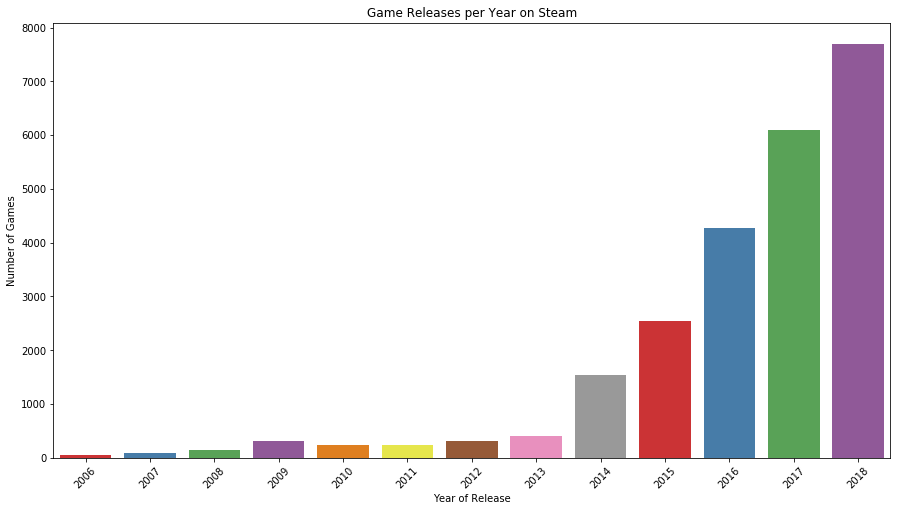

In [8]:
plt.figure(figsize=(15,8))

yearplot = sns.barplot(data=df_year,
                      x='year',
                      y='amount',
                      palette='Set1')
yearplot.set(xlabel='Year of Release', ylabel='Number of Games')
yearplot.set_xticklabels(yearplot.get_xticklabels(),rotation=45)
yearplot.set_title('Game Releases per Year on Steam')

;

plt.savefig('gamerelease')

## Taking a look at price ditribution of those games

In [9]:
df_priceplot = steamdata.copy()

In [10]:
df_drop1 = df_priceplot['price'].sort_values(ascending=False).head(10).to_frame().reset_index()
df_drop1

,index,price
0,21105,421.99
1,10624,154.99
2,14917,154.99
3,25568,154.99
4,10910,154.99
5,17126,154.99
6,18503,78.99
7,12212,75.99
8,23709,69.99
9,14826,60.99


In [11]:
drop_list1 = df_drop1['index'].tolist()

In [12]:
df_priceplot.drop(drop_list1,inplace=True)

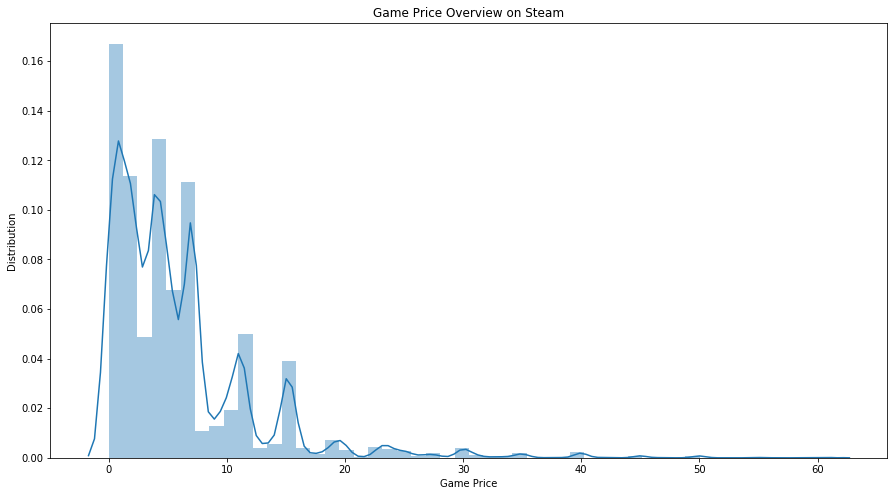

In [13]:
plt.figure(figsize=(15,8))

priceplot = sns.distplot(df_priceplot['price'], bins=50)
priceplot.set(xlabel='Game Price', ylabel='Distribution')
priceplot.set_title('Game Price Overview on Steam')
;

plt.savefig('gameprice')


## To evaluate the quality of games we're taking a look at there ratings

In [14]:
steamdata

,appid,name,release_date,developer,publisher,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,total_ratings,rating_ratio,rating,release_year,multi_player,single_player,action,adventure,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,type,year
0,10,Counter-Strike,2000-11-01,Valve,Valve,0,Action,0,124534,3339,17612,317,10000000,7.19,127873,0.973888,95.975678,2000,1,0,1,0,0,0,0,0,0,0,0,0,Paid,2000
1,20,Team Fortress Classic,1999-04-01,Valve,Valve,0,Action,0,3318,633,277,62,5000000,3.99,3951,0.839787,80.508259,1999,1,0,1,0,0,0,0,0,0,0,0,0,Paid,1999
2,30,Day of Defeat,2003-05-01,Valve,Valve,0,Action,0,3416,398,187,34,5000000,3.99,3814,0.895648,85.823915,2003,1,0,1,0,0,0,0,0,0,0,0,0,Paid,2003
3,40,Deathmatch Classic,2001-06-01,Valve,Valve,0,Action,0,1273,267,258,184,5000000,3.99,1540,0.826623,78.126542,2001,1,0,1,0,0,0,0,0,0,0,0,0,Paid,2001
4,50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,0,Action,0,5250,288,624,415,5000000,3.99,5538,0.947996,91.260480,1999,1,1,1,0,0,0,0,0,0,0,0,0,Paid,1999
5,60,Ricochet,2000-11-01,Valve,Valve,0,Action,0,2758,684,175,10,5000000,3.99,3442,0.801278,76.676163,2000,1,0,1,0,0,0,0,0,0,0,0,0,Paid,2000
6,70,Half-Life,1998-11-08,Valve,Valve,0,Action,0,27755,1100,1300,83,5000000,7.19,28855,0.961878,94.002967,1998,1,1,1,0,0,0,0,0,0,0,0,0,Paid,1998
7,80,Counter-Strike: Condition Zero,2004-03-01,Valve,Valve,0,Action,0,12120,1439,427,43,10000000,7.19,13559,0.893871,86.838469,2004,1,1,1,0,0,0,0,0,0,0,0,0,Paid,2004
8,130,Half-Life: Blue Shift,2001-06-01,Gearbox Software,Valve,0,Action,0,3822,420,361,205,5000000,3.99,4242,0.900990,86.454395,2001,0,1,1,0,0,0,0,0,0,0,0,0,Paid,2001
9,220,Half-Life 2,2004-11-16,Valve,Valve,0,Action,33,67902,2419,691,402,10000000,7.19,70321,0.965601,94.882618,2004,0,1,1,0,0,0,0,0,0,0,0,0,Paid,2004


In [24]:
steamdata2 = steamdata[(steamdata['owners'] > 0) & (steamdata['total_ratings'] > 0)].copy()

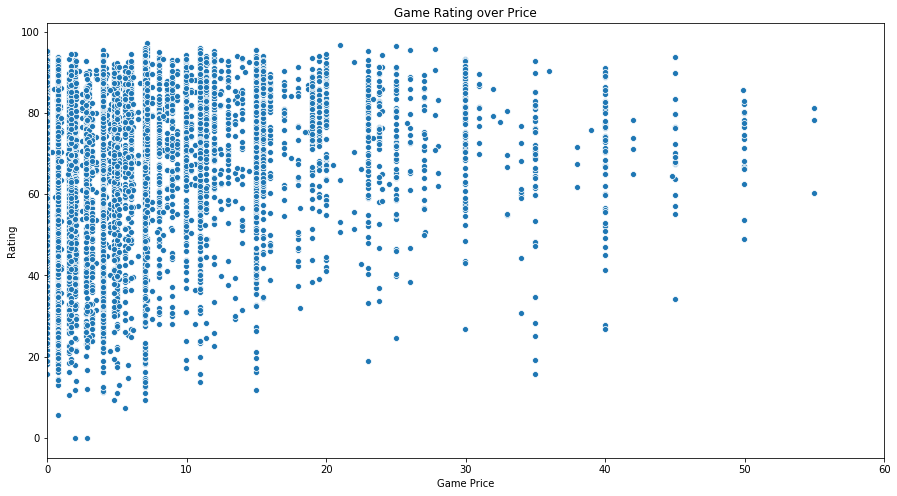

In [50]:
plt.figure(figsize=(15,8))

ratingplot = sns.scatterplot(data=steamdata2,
                      x='price',
                      y='rating',
                      palette='Set1')
ratingplot.set(xlabel='Game Price', ylabel='Rating')
ratingplot.set(xlim=(0,60))

ratingplot.set_title('Game Rating over Price')
;

plt.savefig('rating1')

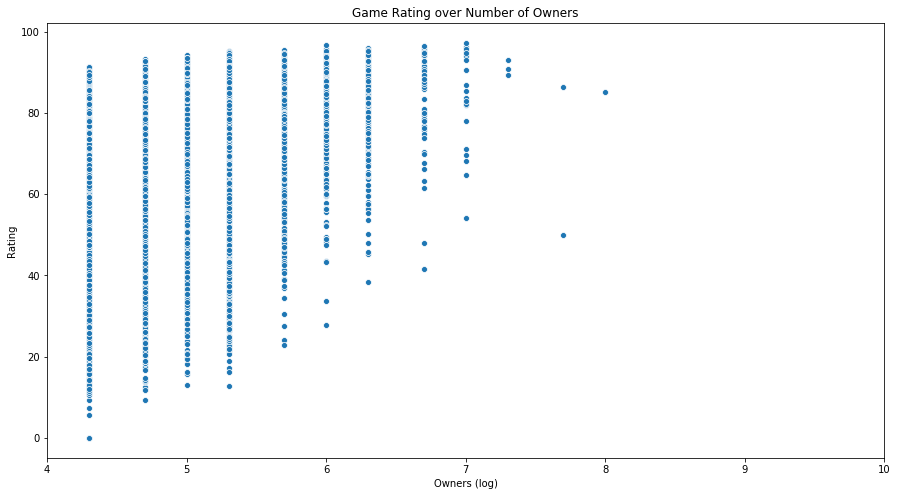

In [51]:
plt.figure(figsize=(15,8))

rating2plot = sns.scatterplot(data=steamdata2,
                      x=np.log10(steamdata2.owners),
                      y='rating'                      )
rating2plot.set(xlabel='Owners (log)', ylabel='Rating')
rating2plot.set(xlim=(4,10))

rating2plot.set_title('Game Rating over Number of Owners')
;
plt.savefig('rating2')

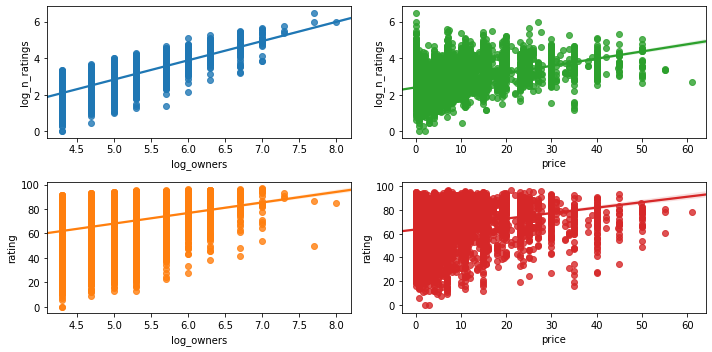

In [40]:
steamdata2 = steamdata[(steamdata['owners'] > 0) & (steamdata['total_ratings'] > 0)].copy()
log_df = pd.DataFrame(zip(np.log10(steamdata2.owners), np.log10(steamdata2.total_ratings), steamdata2.rating, steamdata2.price),
                      columns=['log_owners', 'log_n_ratings', 'rating', 'price'])

fig, axarr = plt.subplots(2, 2, figsize=(10,5))

sns.regplot(x='log_owners', y='log_n_ratings', data=log_df, ax=axarr[0][0])
sns.regplot(x='log_owners', y='rating', data=log_df, ax=axarr[1][0])
sns.regplot(x='price', y='log_n_ratings', data=log_df, ax=axarr[0][1])
sns.regplot(x='price', y='rating', data=log_df, ax=axarr[1][1])

plt.tight_layout()
plt.show()

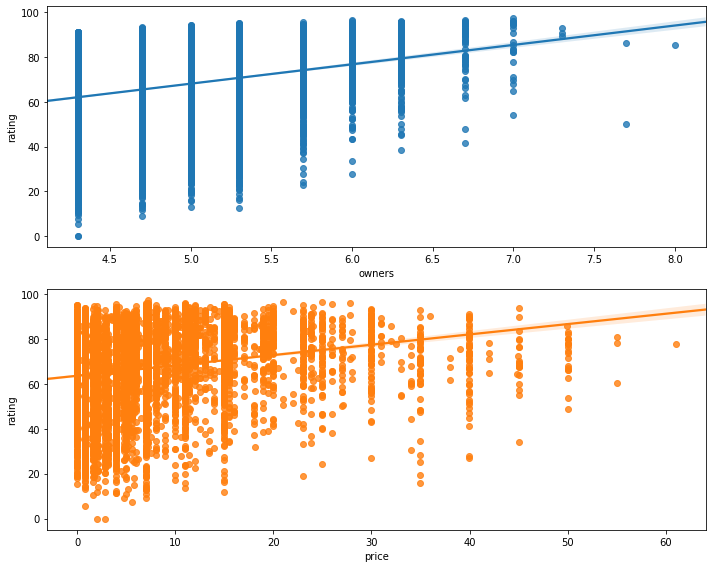

In [61]:
fig, pos = plt.subplots(2, 1, figsize=(10,8))

sns.regplot(data=steamdata2,x=np.log10(steamdata2.owners), y='rating', ax=pos[0])
sns.regplot(data=steamdata2,x='price', y='rating', ax=pos[1])
plt.tight_layout()
plt.savefig('comborating')
plt.show()



In [65]:
gen_cols1 = steamdata.columns[-14:-2]

In [66]:
gen_cols2 = gen_cols1.drop(['multi_player', 'single_player'])

In [88]:
gen_cols2

Index(['action', 'adventure', 'casual', 'indie', 'massively_multiplayer',
       'rpg', 'racing', 'simulation', 'sports', 'strategy'],
      dtype='object')

## Evaluating the genres per price and rating

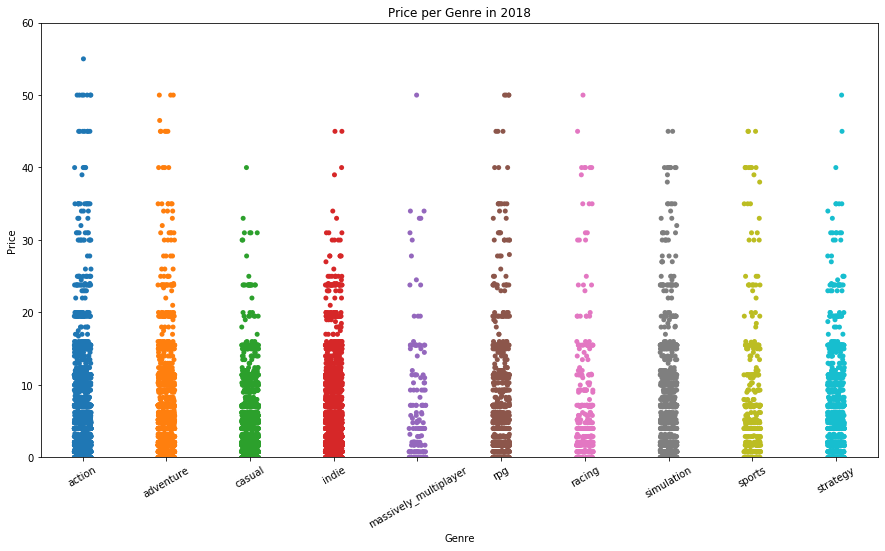

In [100]:
df_help1 = pd.DataFrame()

for col in gen_cols2:
    df_temp1 = steamdata[steamdata[col] == 1].copy()
    df_temp1['genre'] = col
    df_help1 = pd.concat([df_help1,df_temp1], axis=0)


df_plot1 = df_help1[df_help1['release_year'] == 2018].copy()

plt.figure(figsize=(15,8))
genreplot = sns.stripplot(data=df_plot1, x='genre', y='price')
genreplot.set(ylim=(0,60))
genreplot.set_xticklabels(genreplot.get_xticklabels(),rotation=30)
genreplot.set(xlabel='Genre', ylabel='Price')
genreplot.set_title('Price per Genre in 2018');

plt.savefig('GenrePriceSplit')

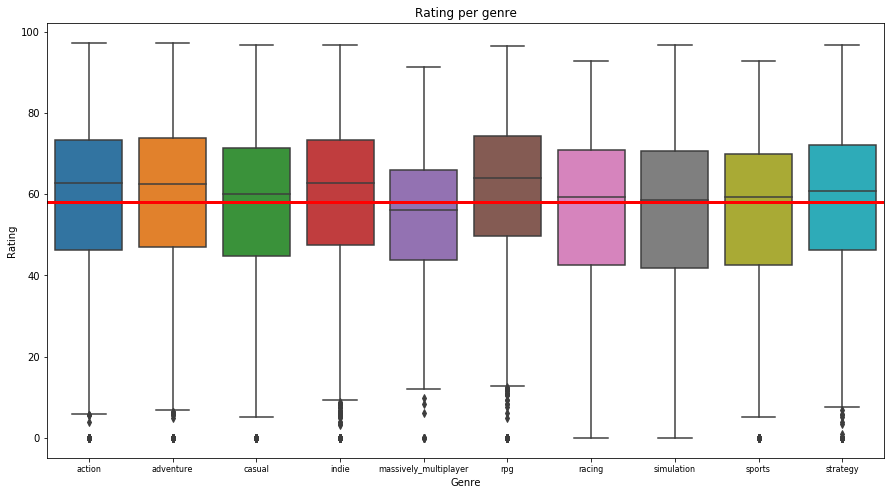

In [97]:
df_help2 = pd.DataFrame()

for col in gen_cols2:
    ratings = pd.DataFrame(steamdata.loc[steamdata[col] == 1, 'rating'].values, columns=['rating'])
    ratings['genre'] = col
    df_help2 = pd.concat([df_help2, ratings], axis=0)

fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x='genre', y='rating', data=df_help2, ax=ax)
ax.axhline(df_help2.rating.mean(), color='red', lw=3)
#ax.text(9.6, g_df.rating.median()-1, 'median', color='black', alpha=.8)

ax.tick_params(axis='x', labelsize=8)
ax.set_title("Rating per genre")
ax.set(xlabel='Genre', ylabel='Rating');
plt.savefig('BoxPlotRatingGenre')
plt.show()

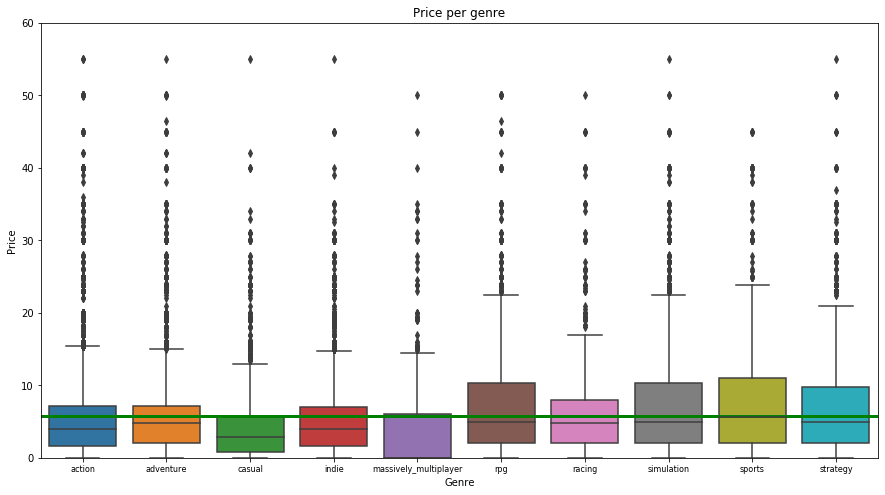

In [98]:
df_help3 = pd.DataFrame()

for col in gen_cols2:
    price = pd.DataFrame(steamdata.loc[steamdata[col] == 1, 'price'].values, columns=['price'])
    price['genre'] = col
    df_help3 = pd.concat([df_help3, price], axis=0)

fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x='genre', y='price', data=df_help3, ax=ax)
ax.axhline(df_help3.price.mean(), color='green', lw=3)
#ax.text(9.6, g_df.rating.median()-1, 'median', color='black', alpha=.8)

ax.tick_params(axis='x', labelsize=8)
ax.set_title("Price per genre")
ax.set(ylim=(0,60))
ax.set(xlabel='Genre', ylabel='Price');
plt.savefig('BoxPlotPriceGenre')
plt.show()